In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("games_clean.csv")

In [ ]:
#Im looking into the data just doing some data exploration

In [25]:
df.dtypes

name             object
platform         object
release_date     object
summary          object
metascore       float64
userscore       float64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142417 entries, 0 to 142416
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          142417 non-null  object 
 1   platform      142417 non-null  object 
 2   release_date  142417 non-null  object 
 3   summary       124702 non-null  object 
 4   metascore     30262 non-null   float64
 5   userscore     36431 non-null   float64
dtypes: float64(2), object(4)
memory usage: 6.5+ MB


In [27]:
df.head()

,name,platform,release_date,summary,metascore,userscore
0,! SPACE ACCIDENT !,PC,2022-02-10,The year is 2119. A turning point has begun in...,NaN,NaN
1,! That Bastard Is Trying To Steal Our Gold !,PC,2014-05-11,It's a fun puzzle game where you need to steal...,NaN,3.4
2,!4RC4N01D!,PC,2018-01-12,Hardcore arkanoid in the spirit of old games f...,NaN,4.0
3,!4RC4N01D! 2: Retro Edition,PC,2018-02-06,"Everyone dreams of returning 2007, but no one ...",NaN,3.8
4,!4RC4N01D! 3: Cold Space,PC,2018-03-08,!4RC4N01D! returns! This time we have an accid...,NaN,3.0


In [30]:
df.columns

Index(['name', 'platform', 'release_date', 'summary', 'metascore',
       'userscore'],
      dtype='object')

In [ ]:
#Im now sorting the games with the highest metascore

In [33]:
df[['name', 'metascore']].sort_values('metascore', ascending=False).head(50)

,name,metascore
122652,The Legend of Zelda: Ocarina of Time,99.0
128075,Tony Hawk's Pro Skater 2,98.0
32620,Dicey Dungeons,98.0
51335,Grand Theft Auto IV,98.0
51336,Grand Theft Auto IV,98.0
33843,Divinity: Original Sin II - Definitive Edition,98.0
109168,SoulCalibur,98.0
51355,Grand Theft Auto V,97.0
53481,Halo: Combat Evolved,97.0
96636,Red Dead Redemption 2,97.0


In [ ]:
#Question 1: Which platform has the highest average metascore and userscore?

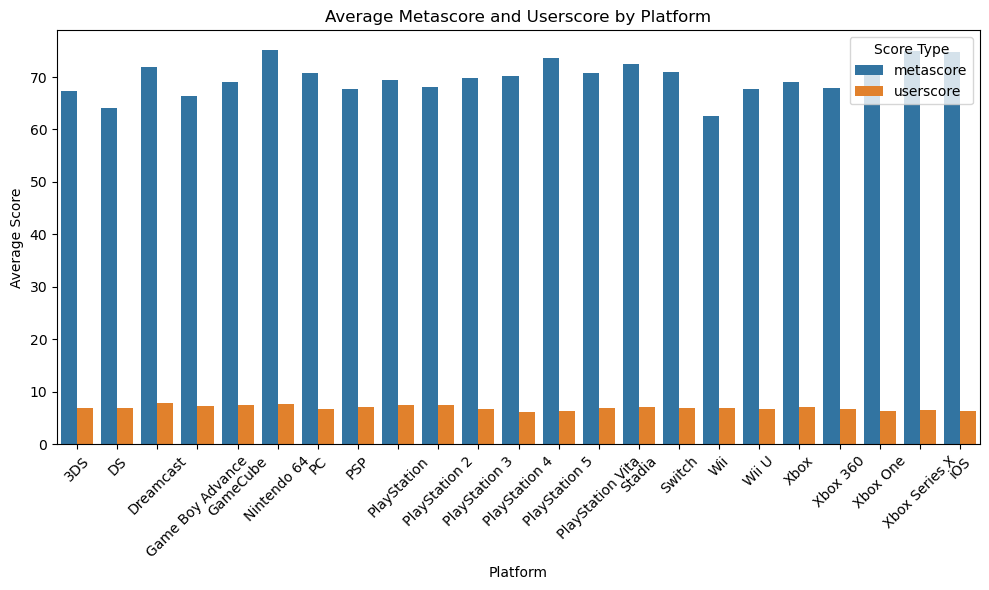

In [43]:
platform_avg_scores = df.groupby('platform')[['metascore', 'userscore']].mean().reset_index()

platform_scores_melted = pd.melt(platform_avg_scores, id_vars='platform', var_name='Score Type', value_name='Average Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='Average Score', hue='Score Type', data=platform_scores_melted)
plt.title('Average Metascore and Userscore by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.tight_layout()
plt.show()


In [42]:
platform_avg_scores = df.groupby('platform')[['metascore', 'userscore']].mean()

platform_with_highest_metascore = platform_avg_scores['metascore'].idxmax()
highest_metascore = platform_avg_scores['metascore'].max()

platform_with_highest_userscore = platform_avg_scores['userscore'].idxmax()
highest_userscore = platform_avg_scores['userscore'].max()

print(f"The platform with the highest average metascore is '{platform_with_highest_metascore}' with a score of {highest_metascore:.2f}")
print(f"The platform with the highest average userscore is '{platform_with_highest_userscore}' with a score of {highest_userscore:.2f}")



The platform with the highest average metascore is 'Nintendo 64' with a score of 75.13
The platform with the highest average userscore is 'Dreamcast' with a score of 7.81


In [ ]:
#Question 2: How does the average metascore and userscore change over the years for the PC platform?

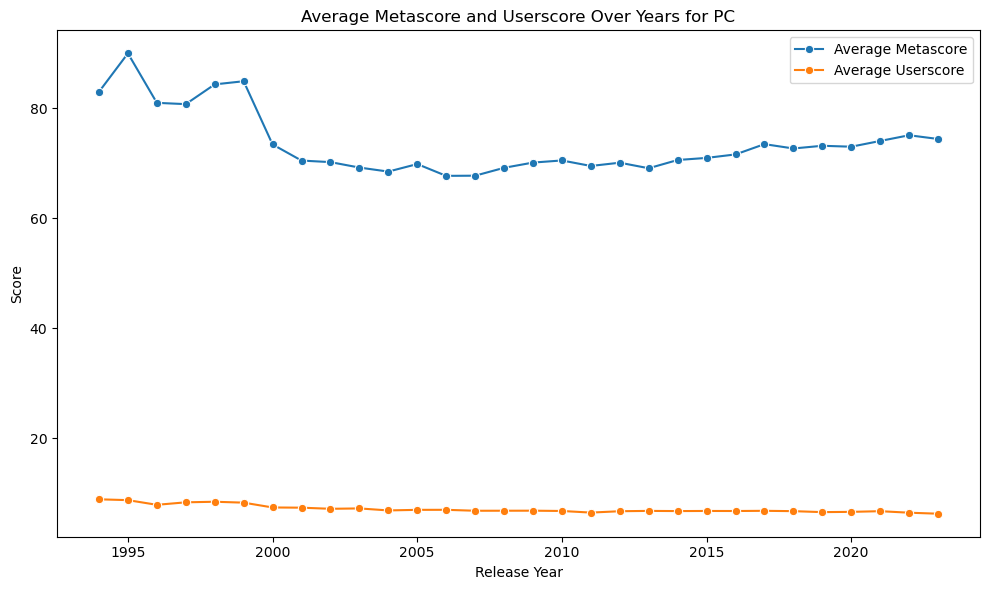

In [54]:
pc_data = df[df['platform'] == 'PC'].copy()

pc_data.dropna(subset=['metascore', 'userscore'], inplace=True)

pc_data['release_year'] = pc_data['release_date'].dt.year

avg_scores_by_year = pc_data.groupby('release_year')[['metascore', 'userscore']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='metascore', data=avg_scores_by_year, marker='o', label='Average Metascore')
sns.lineplot(x='release_year', y='userscore', data=avg_scores_by_year, marker='o', label='Average Userscore')
plt.title('Average Metascore and Userscore Over Years for PC')
plt.xlabel('Release Year')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Question 3:What is the relationship between metascore and userscore for games on various gaming platforms?

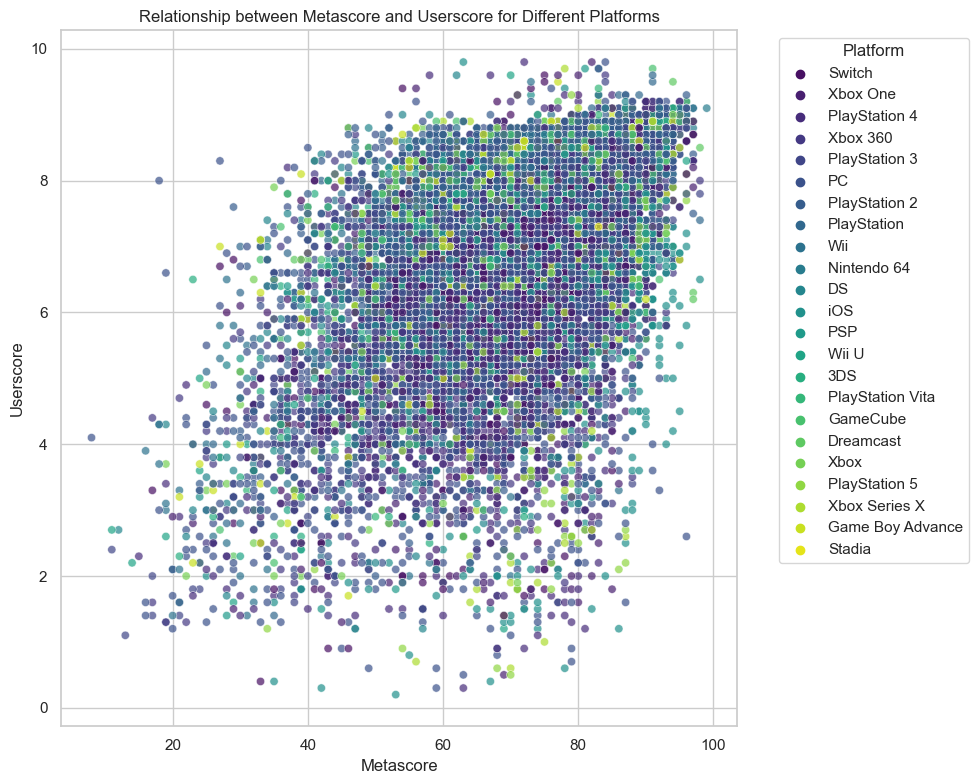

In [62]:
df.dropna(subset=['metascore', 'userscore'], inplace=True)

sns.set(style='whitegrid')

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='metascore', y='userscore', hue='platform', data=df, palette='viridis', alpha=0.7)
plt.title('Relationship between Metascore and Userscore for Different Platforms')
plt.xlabel('Metascore')
plt.ylabel('Userscore')

plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
scatter.legend_.set_title('Platform')
plt.tight_layout()
plt.show()
